2021-11-04 13:42:20.951757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-04 13:42:20.951777: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-04 13:42:21.584435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-04 13:42:21.584453: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-04 13:42:21.584465: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2021-11-04 13:42:21.584621: I tensorflow/core/platform/cpu_feature_gua

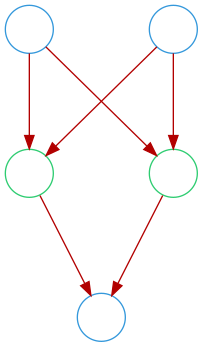

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import sklearn.datasets as datasets

from kviz.dense import DenseGraph
import tensorflow as tf
from tensorflow import keras, math, random, stack
from tensorflow.keras import layers, initializers
from tensorflow.keras.activations import relu

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

ACTIVATION = 'sigmoid'
model = keras.models.Sequential()
model.add(layers.Dense(2, input_dim=2, activation=ACTIVATION))
model.add(layers.Dense(1, activation=ACTIVATION))
model.compile(loss="binary_crossentropy")

dg = DenseGraph(model)
dg.render('graph')
Image(filename='graph.png')

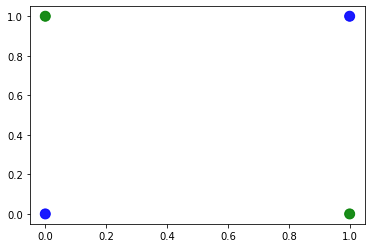

In [2]:
centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=200, centers=centers, cluster_std=1,
                                random_state=1)

# CIRCLE
def generate_circle_data(t, centers):
    # create some space between the classes
    X = np.array(list(filter(
        lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 
        or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t
    )))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# LINE
def generate_line_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CURVE
def generate_curve_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : m.cos(4*x[0]) - x[1] < -.5 or m.cos(4*x[0]) - x[1] > .5, t)))
    Y = np.array([1 if m.cos(4*x[0]) - x[1] >= 0 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

X, Y = generate_xor_data()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

2021-11-04 13:42:28.535732: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


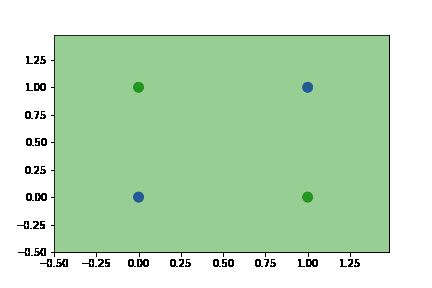

In [3]:
dg.animate_learning(X, Y, filename='animate', verbose=0, epochs=1000)
Image(filename='animate.gif')

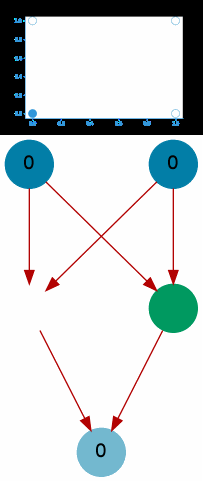

In [4]:
dg.animate_activations(X, filename='act')
Image(filename='act_stacked.gif')

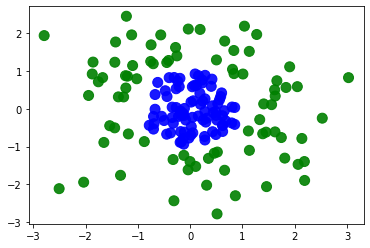

In [5]:
X, Y = generate_circle_data(t, centers)

plt.scatter(X[:,0],X[:,1],color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()

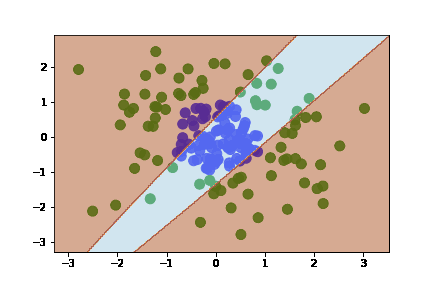

In [6]:
dg = DenseGraph(model)
dg.animate_learning(X, Y, filename='animate', duration=300, verbose=0, epochs=1000, batch_size=50)
Image(filename='animate.gif')

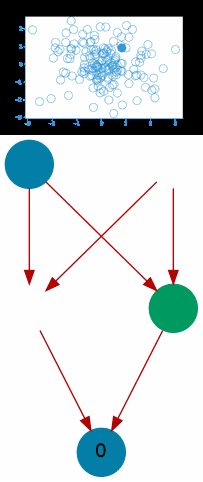

In [7]:
dg.animate_activations(X, filename='act', duration=50)
Image(filename='act_stacked.gif')

{'name': 'dense_19', 'trainable': True, 'batch_input_shape': (None, 2), 'dtype': 'float32', 'units': 3, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-1.6559298 ,  1.1852598 ,  0.33871752],
       [ 2.8680913 , -2.739159  ,  2.2925348 ]], dtype=float32), array([ 2.5336502,  2.4016943, -1.7097042], dtype=float32)]


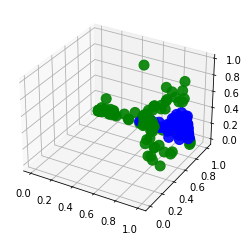

In [11]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

model = keras.models.Sequential()
model.add(layers.Dense(3, input_dim=2, activation='sigmoid'))
model.add(layers.Dense(1, activation=ACTIVATION))
model.compile(loss="binary_crossentropy")

history = model.fit(X, Y, batch_size=50, epochs=1000, verbose=0)

# Show the transformation of the input at the first hidden layer
layer = model.layers[0]
print(layer.get_config(), layer.get_weights())
keras_function = keras.backend.function([model.input], [layer.output])
layerVals = np.array(keras_function(X))[0]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(layerVals[:,0], layerVals[:, 1], layerVals[:, 2], color=colors[Y].tolist(), s=100, alpha=.9)
plt.show()